In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [5]:
# added conn
## ask about encoding for UTF-8

engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
### Check SQLite viewer?

inspector = inspect(engine)

# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Using the inspector to print the column names within the 'measurement' table and its types

columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# Using the inspector to print the column names within the 'station' table and its types

columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
# Display the row's columns and data in dictionary format for Measurement

first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11522b160>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0}

In [14]:
# Display the row's columns and data in dictionary format for Station

first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11522bc50>,
 'elevation': 3.0,
 'id': 1,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates


In [15]:
# Calculate the date 1 year ago from today

today = dt.date(2018, 7, 25)
last_year = today - dt.timedelta(days=365)

print(last_year)

2017-07-25


In [16]:
# Perform a query to retrieve the data and precipitation scores
# Select only the date and prcp values.

rain = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date > last_year).\
        order_by(Measurement.date).all()
        
print(rain)

[('2017-07-26', 0.0), ('2017-07-26', 0.06), ('2017-07-26', 0.02), ('2017-07-26', None), ('2017-07-26', 0.0), ('2017-07-26', 0.12), ('2017-07-26', 0.3), ('2017-07-27', 0.0), ('2017-07-27', 0.0), ('2017-07-27', 0.0), ('2017-07-27', None), ('2017-07-27', 0.0), ('2017-07-27', 0.01), ('2017-07-27', 0.0), ('2017-07-28', 0.0), ('2017-07-28', 0.13), ('2017-07-28', 0.14), ('2017-07-28', 0.01), ('2017-07-28', 0.0), ('2017-07-28', 0.09), ('2017-07-28', 0.4), ('2017-07-29', 0.0), ('2017-07-29', 0.06), ('2017-07-29', 0.02), ('2017-07-29', 0.0), ('2017-07-29', 0.23), ('2017-07-29', 0.3), ('2017-07-30', 0.0), ('2017-07-30', 0.0), ('2017-07-30', 0.0), ('2017-07-30', 0.0), ('2017-07-30', 0.3), ('2017-07-31', 0.0), ('2017-07-31', 0.0), ('2017-07-31', None), ('2017-07-31', None), ('2017-07-31', 0.0), ('2017-07-31', 0.0), ('2017-07-31', 0.0), ('2017-08-01', 0.02), ('2017-08-01', 0.12), ('2017-08-01', 0.0), ('2017-08-01', None), ('2017-08-02', 0.0), ('2017-08-02', 0.05), ('2017-08-02', 0.0), ('2017-08-02',

<IPython.core.display.Javascript object>


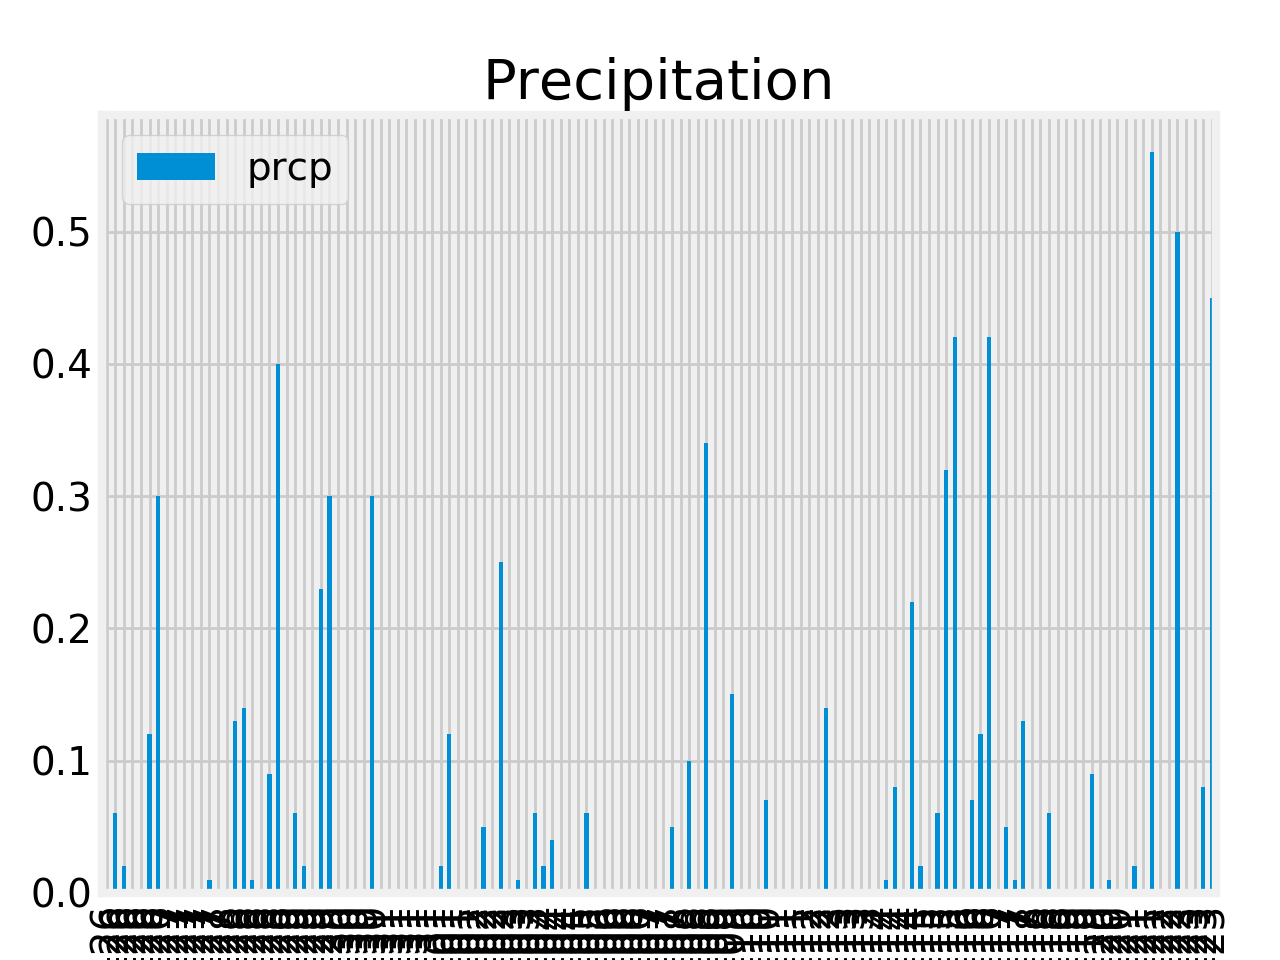

In [17]:
# Load the query results into a Pandas DataFrame and set the index to the date column.

rain_df = pd.DataFrame(rain, columns=['date', 'prcp'])
rain_df.set_index('date', inplace=True)
rain_df.plot.bar(title="Precipitation")
#plt.tight_layout()
# Rotate the xticks for the dates
#plt.xticks(rotation='vertical')

plt.show()


In [18]:
# Plot the results using the DataFrame plot method.
#### making a basic line graph plot
# plot the dataframe




#rain_df.plot(kind='line',x='date',y='prcp',color= 'red')
#plt.show()

rain_df.plot("date", "prcp")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Hawaii Precipitation")
plt.legend(["Precipitation"])
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()




KeyError: 'date'

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data

rain_df.describe()


,prcp
count,116.000000
mean,0.063534
std,0.120998
min,0.000000
25%,0.000000
50%,0.000000
75%,0.062500
max,0.560000


STATION ANALYSIS

In [ ]:
# Design a query to calculate the total number of stations.
# Design a query to find the most active stations.
    # List the stations and observation counts in descending order
    # Which station has the highest number of observations?
    # Hint: You may need to use functions such as func.min, func.max, func.avg, and func.count in your queries.
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
    # Filter by the station with the highest number of observations.
    # Plot the results as a histogram with bins=12.

In [20]:
# How many stations are available in this dataset?

stations = session.query(Measurement).group_by(Measurement.station).count()

print(stations)

9


In [21]:
# What are the most active stations?
#### Check SQLite viewer again- (Measurement= station,date,prcp,tobs)
####                            (Station= station,name,latitude,longitude,elevation)

# List the stations and the counts in descending order.

ma_stations = session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).\
               order_by(func.count(Measurement.date).desc()).all()

print(ma_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature from most active station?


sel = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
ma_tobs = session.query(*sel).\
    filter(Measurement.station == "USC00519281").all()
    

print(ma_tobs)



[('USC00519281', 54.0, 85.0, 71.66378066378067)]


In [23]:
# Query the last 12 months of temperature observation data for USC00519281


ma_lastyear = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.date > last_year).\
    filter(Measurement.station == "USC00519281").\
    order_by (Measurement.date).all()
    
ma_lastyear


[('USC00519281', '2017-07-26', 75.0),
 ('USC00519281', '2017-07-27', 76.0),
 ('USC00519281', '2017-07-28', 81.0),
 ('USC00519281', '2017-07-29', 82.0),
 ('USC00519281', '2017-07-30', 81.0),
 ('USC00519281', '2017-07-31', 76.0),
 ('USC00519281', '2017-08-04', 77.0),
 ('USC00519281', '2017-08-05', 82.0),
 ('USC00519281', '2017-08-06', 83.0),
 ('USC00519281', '2017-08-13', 77.0),
 ('USC00519281', '2017-08-14', 77.0),
 ('USC00519281', '2017-08-15', 77.0),
 ('USC00519281', '2017-08-16', 76.0),
 ('USC00519281', '2017-08-17', 76.0),
 ('USC00519281', '2017-08-18', 79.0)]

In [24]:
ma_lastyear_df = pd.DataFrame(ma_lastyear)
ma_lastyear_df.set_index('date').head(10)

,station,tobs
date,,
2017-07-26,USC00519281,75.0
2017-07-27,USC00519281,76.0
2017-07-28,USC00519281,81.0
2017-07-29,USC00519281,82.0
2017-07-30,USC00519281,81.0
2017-07-31,USC00519281,76.0
2017-08-04,USC00519281,77.0
2017-08-05,USC00519281,82.0
2017-08-06,USC00519281,83.0


<IPython.core.display.Javascript object>


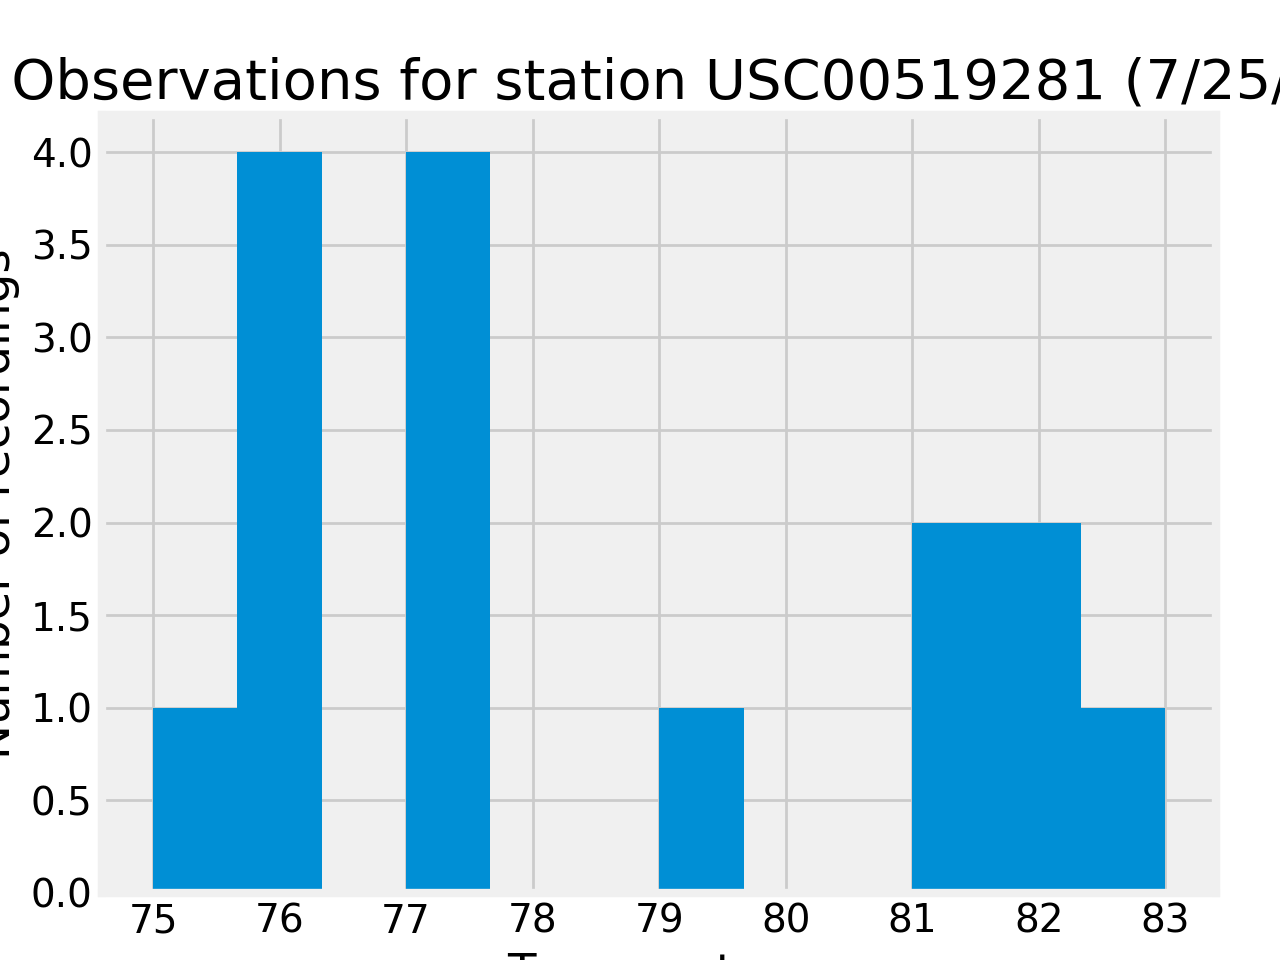

In [25]:
# Filter by the station with the highest number of observations.
# Plot results as histogram with 12 bins

plt.hist(ma_lastyear_df['tobs'],12)
plt.xlabel("Temperature")
plt.ylabel("Number of recordings")
plt.title("Temperature Observations for station USC00519281 (7/25/17 to 7/25/18)")

plt.show()
